In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

from matplotlib import pyplot

from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt

from sklearn.model_selection import  GridSearchCV

from sklearn.metrics import log_loss


%matplotlib inline

data_path = "C:/Users/Administrator/Desktop/AI/Work/HW2/"

data = pd.read_csv(data_path +"diabetes.csv")

data.head(10)

J:\MyInstall\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


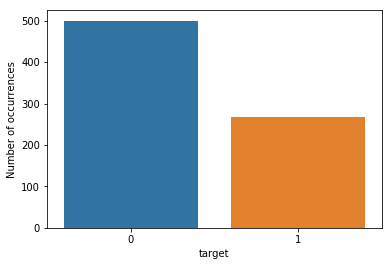

In [3]:
#Target 分布，看看各类样本是否均衡
sns.countplot(data.Outcome);
pyplot.xlabel('target');
pyplot.ylabel('Number of occurrences');

In [4]:
#得到目标值

y_train = data['Outcome']

#得到训练特征
x_train = data.drop('Outcome',axis=1)

x_train = np.array(x_train)


#标准化处理
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()

x_train = ss_X.fit_transform(x_train)




#80%用来巡礼阿宝
train_X,test_X, train_y, test_y = train_test_split(x_train,  
                                                   y_train,  
                                                   test_size = 0.8,  
                                                   random_state = 0)  


print (train_X)


[[-0.84488505  1.63075243  0.25303625 ...,  0.61015436 -1.15935199
   0.40494237]
 [ 0.3429808  -0.49745345  0.14964075 ...,  0.62284628 -0.94492356
  -0.44593516]
 [-0.25095213  2.19410104 -0.05715025 ..., -0.13866919 -0.52210695
   0.06459135]
 ..., 
 [ 0.04601433 -0.84172205 -0.2122435  ..., -0.92556851 -0.97814487
  -1.04154944]
 [ 2.12477957 -1.12339636  0.25303625 ..., -0.24020459 -0.51908683
   0.14967911]
 [ 0.3429808   0.47275805  0.66661825 ..., -4.06047387  0.50775352
   3.04266271]]


In [5]:
#缺省的logisticRegression 参数

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


### 参数调优

In [6]:
# 交叉验证用于评估模型性能和进行参数调优(模型选择)
#分类任务中交叉验证缺省是采用StratifiedFFold

from sklearn.cross_validation import cross_val_score

loss = cross_val_score(lr,train_X,train_y,cv=10,scoring='neg_log_loss')

print('logloss of each fold is:%',-loss)

print('cv logloss is:%',-loss.mean())

('logloss of each fold is:%', array([ 0.58978303,  0.61172808,  0.80843559,  0.36466707,  0.50189047,
        0.43902988,  0.55211238,  0.61505575,  0.37422983,  0.51528353]))
('cv logloss is:%', 0.53722156158573786)


In [7]:
#参数调优

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

penaltys=['l1','l2']

Cs=[0.001,0.01,0.1,1,10,100,1000,10000]

tuned_parameters = dict(penalty=penaltys,C=Cs)

lr_penalty = LogisticRegression()

grid = GridSearchCV(lr_penalty,tuned_parameters,cv=5,scoring='neg_log_loss')

grid.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [8]:
grid.cv_results_

J:\MyInstall\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
J:\MyInstall\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
J:\MyInstall\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
J:\MyInstall\Anaconda2\lib\site-packages\sklearn\utils\deprecat

{'mean_fit_time': array([ 0.00219994,  0.00220003,  0.00159998,  0.00180001,  0.00180001,
         0.0019999 ,  0.002     ,  0.00180006,  0.00199995,  0.00199995,
         0.00220008,  0.00219998,  0.00419998,  0.00319996,  0.00160003,
         0.00200005]),
 'mean_score_time': array([ 0.004     ,  0.00319996,  0.0026    ,  0.002     ,  0.00259995,
         0.00280004,  0.00219998,  0.00240002,  0.00280004,  0.00220008,
         0.00239992,  0.00559998,  0.00660005,  0.00380001,  0.00219998,
         0.00239992]),
 'mean_test_score': array([-0.69314718, -0.67909111, -0.69314718, -0.6073056 , -0.55806209,
        -0.5287282 , -0.54844042, -0.55935351, -0.57853167, -0.5797249 ,
        -0.58246763, -0.58259289, -0.5828696 , -0.58289142, -0.58291763,
        -0.5829214 ]),
 'mean_train_score': array([-0.69314718, -0.67766716, -0.69314718, -0.5966194 , -0.54071143,
        -0.47951115, -0.45151563, -0.44892888, -0.44745698, -0.44742769,
        -0.44740618, -0.44740589, -0.44740566, -0.447

In [9]:
print(-grid.best_score_)
print(grid.best_params_)

0.528728195023
{'penalty': 'l2', 'C': 0.1}


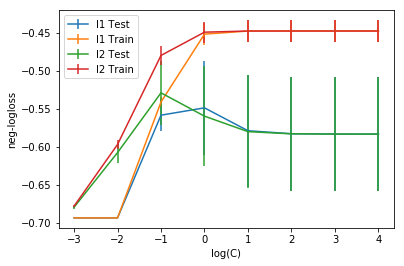

In [10]:
#pd.DataFrame(grid.cv_results_).to_csv('LogisticGridSearchCV_Otto.csv')
#cvresult = pd.DataFrame.from_csv('LogisticGridSearchCV_Otto.csv')
#test_means = cv_results['mean_test_score']
#test_stds = cv_results['std_test_score'] 
#train_means = cvresult['mean_train_score']
#train_stds = cvresult['std_train_score'] 


# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

### 上图给出了L1正则和L2正则下、不同正则参数C对应的模型在训练集上测试集上的正确率（score）。可以看出在训练集上C越大（正则越少）的模型性能越好；但在测试集上当C=100时性能最好（L1正则和L2正则均是）

### 用LogisticRegressionCV实现正则化的 Logistic Regression

#### L1正则

In [11]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L1正则 --> 可选用saga优化求解器(0.19版本新功能)
# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
lrcv_L1.fit(train_X, train_y) 

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [12]:
lrcv_L1.scores_

{1: array([[-0.60306301, -0.65080486, -0.65724208, -0.657913  ],
        [-0.60073965, -0.64616371, -0.65143281, -0.65195748],
        [-0.48023569, -0.49535331, -0.49747474, -0.49769213],
        [-0.58967698, -0.61249814, -0.61567097, -0.61600958],
        [-0.46299191, -0.48160967, -0.48418537, -0.48444479]])}

[-0.60306301 -0.65080486 -0.65724208 -0.657913  ]
[-0.60073965 -0.64616371 -0.65143281 -0.65195748]
[-0.48023569 -0.49535331 -0.49747474 -0.49769213]
[-0.58967698 -0.61249814 -0.61567097 -0.61600958]
[-0.46299191 -0.48160967 -0.48418537 -0.48444479]


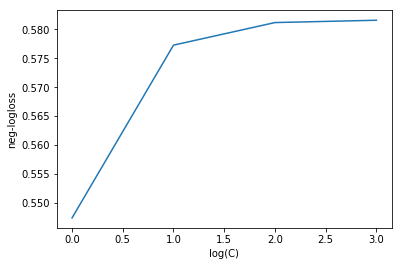

In [13]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)

n_classes = 5

array = lrcv_L1.scores_

scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
   # print(np.mean(tuple(array.values())[0][j],axis = 0))
    print tuple(array.values())[0][j]
    scores[j][:] = tuple(array.values())[0][j]
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C

In [14]:
lrcv_L1.coef_

array([[ 0.3310358 ,  1.06732454,  0.        ,  0.0461603 , -0.3676885 ,
         0.59140289,  0.29851319,  0.        ]])

### l2正则

In [15]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs，为了和GridSeachCV比较，也用liblinear

lr_cv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', solver='liblinear', multi_class='ovr')
lr_cv_L2.fit(train_X, train_y)  

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [16]:
lr_cv_L2.scores_

{1: array([[-0.62320614, -0.65308667, -0.65747315, -0.65793249],
        [-0.62338804, -0.64838829, -0.65166731, -0.65200561],
        [-0.48597717, -0.49599931, -0.4975406 , -0.49770242],
        [-0.58711603, -0.6122243 , -0.61565459, -0.61601044],
        [-0.47140616, -0.48266391, -0.48428644, -0.48445543]])}

[-0.62320614 -0.65308667 -0.65747315 -0.65793249]
[-0.62338804 -0.64838829 -0.65166731 -0.65200561]
[-0.48597717 -0.49599931 -0.4975406  -0.49770242]
[-0.58711603 -0.6122243  -0.61565459 -0.61601044]
[-0.47140616 -0.48266391 -0.48428644 -0.48445543]


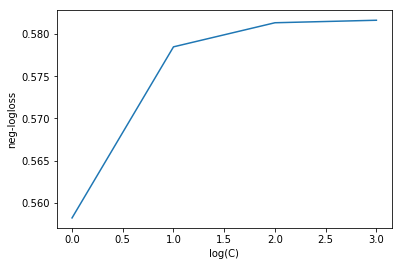

In [17]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)

n_classes = 5

array = lr_cv_L2.scores_

scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
   # print(np.mean(tuple(array.values())[0][j],axis = 0))
    print tuple(array.values())[0][j]
    scores[j][:] = tuple(array.values())[0][j]
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C


In [18]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs
# LogisticRegressionCV比GridSearchCV快
lrcv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', multi_class='ovr')
lrcv_L2.fit(train_X, train_y)   

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='lbfgs', tol=0.0001, verbose=0)

In [19]:
lrcv_L2.scores_

{1: array([[-0.63182653, -0.65442458, -0.6576393 , -0.65795593],
        [-0.61746408, -0.64772533, -0.65158617, -0.65199871],
        [-0.49078747, -0.4966887 , -0.49761857, -0.49771689],
        [-0.59120523, -0.61283346, -0.61572387, -0.61602504],
        [-0.47277912, -0.48290569, -0.48430176, -0.48444911]])}

[-0.63182653 -0.65442458 -0.6576393  -0.65795593]
[-0.61746408 -0.64772533 -0.65158617 -0.65199871]
[-0.49078747 -0.4966887  -0.49761857 -0.49771689]
[-0.59120523 -0.61283346 -0.61572387 -0.61602504]
[-0.47277912 -0.48290569 -0.48430176 -0.48444911]


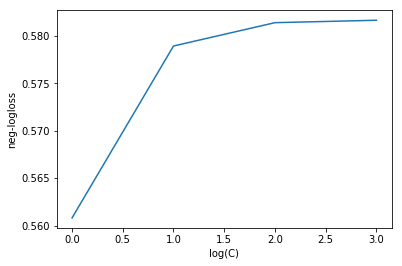

In [20]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)

n_classes = 5

array = lrcv_L2.scores_

scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
   # print(np.mean(tuple(array.values())[0][j],axis = 0))
    print tuple(array.values())[0][j]
    scores[j][:] = tuple(array.values())[0][j]
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C